In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
x = pd.read_csv('Crime_Data_from_2010_to_Present.csv')
# Converting String to Datetime
x['Date Reported'] = pd.to_datetime(x['Date Reported'])
x['Date Occurred'] = pd.to_datetime(x['Date Occurred'])
print(x.head())

   DR Number Date Reported Date Occurred  Time Occurred  Area ID    Area Name  \
0    1208575    2013-03-14    2013-03-11           1800       12  77th Street   
1  102005556    2010-01-25    2010-01-22           2300       20      Olympic   
2        418    2013-03-19    2013-03-18           2030       18    Southeast   
3  101822289    2010-11-11    2010-11-10           1800       18    Southeast   
4   42104479    2014-01-11    2014-01-04           2300       21      Topanga   

   Reporting District  Crime Code                    Crime Code Description  \
0                1241         626         INTIMATE PARTNER - SIMPLE ASSAULT   
1                2071         510                          VEHICLE - STOLEN   
2                1823         510                          VEHICLE - STOLEN   
3                1803         510                          VEHICLE - STOLEN   
4                2133         745  VANDALISM - MISDEAMEANOR ($399 OR UNDER)   

              MO Codes          ...   

In [3]:
print(x.shape)
print(x.columns)

(1836769, 26)
Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')


In [4]:
y = x

In [26]:
z = y
z['YearOccur'] = z['Date Occurred'].dt.year
#data1['YearReport'] = data1['Date Reported'].dt.year
z['Day_Of_Week'] = z['Date Occurred'].dt.day_name()

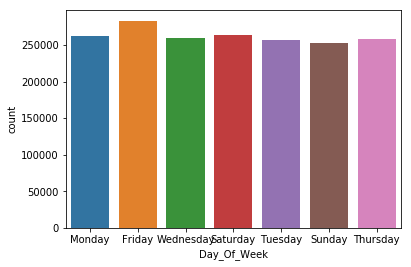

In [27]:
sns.countplot(x = "Day_Of_Week", data =z)

In [32]:
z.to_csv('FinalDataset.csv')

In [33]:
z = z[(z['Date Occurred'] > '2013-01-01') & (z['Date Occurred'] < '2018-01-01')]

In [34]:
t1 = z[['Time_Code', 'DR Number']]
df =  t1['Time_Code'].value_counts().sort_index()
print(df)

0    145754
1    216480
2    348111
3    344624
Name: Time_Code, dtype: int64


In [5]:
# Seeing difference between date occured and date reported
df2 = y.loc[:,['Date Reported', 'Date Occurred', 'Crime Code']] #.sort_values('Date Reported')
df2['Difference'] = df2['Date Reported'].sub(df2['Date Occurred'], axis=0)
df2['Difference'] = ((df2['Difference'].values[:,])/ np.timedelta64(1, 'D')).astype(int)
print(df2.head())
#print(df2.columns)
#df3 = df2.iloc[3]
print(df2 ['Difference'])
#print(type(df3))
df2 = df2.groupby('Difference').count().agg('Date Reported')
print(type(df2))
#for i, v in df3.items():
#  y.at[i,'Difference'] = v


  Date Reported Date Occurred  Crime Code  Difference
0    2013-03-14    2013-03-11         626           3
1    2010-01-25    2010-01-22         510           3
2    2013-03-19    2013-03-18         510           1
3    2010-11-11    2010-11-10         510           1
4    2014-01-11    2014-01-04         745           7
0            3
1            3
2            1
3            1
4            7
5            0
6            1
7            4
8            0
9           73
10           1
11           0
12           9
13          13
14           0
15           1
16           0
17           0
18           0
19           1
20           0
21           0
22           0
23          10
24           0
25           0
26           0
27           1
28           0
29           0
          ... 
1836739      1
1836740      0
1836741      6
1836742      1
1836743      0
1836744      0
1836745      2
1836746     21
1836747      3
1836748    136
1836749      3
1836750      3
1836751     21
1836752     27
1

In [6]:
y['Difference'] = y['Date Reported'].sub(y['Date Occurred'], axis=0)
y['Difference'] = ((y['Difference'].values[:,])/ np.timedelta64(1, 'D')).astype(int)
y.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Difference
0,1208575,2013-03-14,2013-03-11,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",3
1,102005556,2010-01-25,2010-01-22,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",3
2,418,2013-03-19,2013-03-18,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)",1
3,101822289,2010-11-11,2010-11-10,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",1
4,42104479,2014-01-11,2014-01-04,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",7


In [7]:
print(y.shape)
print(y.head())

(1836769, 27)
   DR Number Date Reported Date Occurred  Time Occurred  Area ID    Area Name  \
0    1208575    2013-03-14    2013-03-11           1800       12  77th Street   
1  102005556    2010-01-25    2010-01-22           2300       20      Olympic   
2        418    2013-03-19    2013-03-18           2030       18    Southeast   
3  101822289    2010-11-11    2010-11-10           1800       18    Southeast   
4   42104479    2014-01-11    2014-01-04           2300       21      Topanga   

   Reporting District  Crime Code                    Crime Code Description  \
0                1241         626         INTIMATE PARTNER - SIMPLE ASSAULT   
1                2071         510                          VEHICLE - STOLEN   
2                1823         510                          VEHICLE - STOLEN   
3                1803         510                          VEHICLE - STOLEN   
4                2133         745  VANDALISM - MISDEAMEANOR ($399 OR UNDER)   

              MO Codes  

In [9]:
df3 = x.loc[:,['DR Number','Crime Code Description']].groupby('Crime Code Description').count()
print(df3)
#df3.to_csv('crimetypes.csv')
#arr1 = df3.as_matrix(columns=df3['Difference'])
#df2.to_csv('date-reporting-agg3.csv')
#plt.hist(arr1)

                                                    DR Number
Crime Code Description                                       
ABORTION/ILLEGAL                                            6
ARSON                                                    3040
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER             1437
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT          79318
ATTEMPTED ROBBERY                                       10460
BATTERY - SIMPLE ASSAULT                               167126
BATTERY ON A FIREFIGHTER                                  274
BATTERY POLICE (SIMPLE)                                  4118
BATTERY WITH SEXUAL CONTACT                              9578
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT ...          2
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT ...         22
BIGAMY                                                     10
BIKE - ATTEMPTED STOLEN                                    33
BIKE - STOLEN                                           11225
BLOCKING

### Bucket time into 4 time zones

In [10]:
def bucket_times(row):
    if row['Time Occurred'] >= 0 and row['Time Occurred'] < 600 :
        val = 0
    elif row['Time Occurred'] >= 600 and row['Time Occurred'] < 1200:
        val = 1
    elif row['Time Occurred'] >= 1200 and row['Time Occurred'] < 1800:
        val = 2
    else:
        val = 3
    return val

In [11]:
pd.to_numeric(y['Time Occurred'])
y['Time_Code'] = y.apply(bucket_times, axis=1)

In [12]:
print(y.head())
print(y.shape)

   DR Number Date Reported Date Occurred  Time Occurred  Area ID    Area Name  \
0    1208575    2013-03-14    2013-03-11           1800       12  77th Street   
1  102005556    2010-01-25    2010-01-22           2300       20      Olympic   
2        418    2013-03-19    2013-03-18           2030       18    Southeast   
3  101822289    2010-11-11    2010-11-10           1800       18    Southeast   
4   42104479    2014-01-11    2014-01-04           2300       21      Topanga   

   Reporting District  Crime Code                    Crime Code Description  \
0                1241         626         INTIMATE PARTNER - SIMPLE ASSAULT   
1                2071         510                          VEHICLE - STOLEN   
2                1823         510                          VEHICLE - STOLEN   
3                1803         510                          VEHICLE - STOLEN   
4                2133         745  VANDALISM - MISDEAMEANOR ($399 OR UNDER)   

              MO Codes    ...      Sta

#### Extract Year and Day from date of occurrence

In [13]:
y['YearOccur'] = y['Date Occurred'].dt.year
#data1['YearReport'] = data1['Date Reported'].dt.year
y['Day_Of_Week'] = y['Date Occurred'].dt.day_name()

In [14]:
print(y['YearOccur'].value_counts().sort_index())

2010    208726
2011    200334
2012    201039
2013    192060
2014    194840
2015    214590
2016    224304
2017    230721
2018    170155
Name: YearOccur, dtype: int64


In [15]:
import xlrd
d = {}
wb = xlrd.open_workbook('crime_types.xls')
print(wb)
sh = wb.sheet_by_index(0)   
for i in range(1,150):
    cell_value_class = sh.cell(i,2).value
    cell_value_id = sh.cell(i,0).value
    d[cell_value_id] = cell_value_class

print(len(d))

149


In [16]:
y['Crime_Category'] = y['Crime Code Description'].map(d)

In [17]:
print(y.shape)
print(y.head())

(1836769, 31)
   DR Number Date Reported Date Occurred  Time Occurred  Area ID    Area Name  \
0    1208575    2013-03-14    2013-03-11           1800       12  77th Street   
1  102005556    2010-01-25    2010-01-22           2300       20      Olympic   
2        418    2013-03-19    2013-03-18           2030       18    Southeast   
3  101822289    2010-11-11    2010-11-10           1800       18    Southeast   
4   42104479    2014-01-11    2014-01-04           2300       21      Topanga   

   Reporting District  Crime Code                    Crime Code Description  \
0                1241         626         INTIMATE PARTNER - SIMPLE ASSAULT   
1                2071         510                          VEHICLE - STOLEN   
2                1823         510                          VEHICLE - STOLEN   
3                1803         510                          VEHICLE - STOLEN   
4                2133         745  VANDALISM - MISDEAMEANOR ($399 OR UNDER)   

              MO Codes  

In [18]:
print(y['Crime_Category'].value_counts().sort_index())

assault       194720
battery       181096
burglary      286072
child          27512
document       21619
harassment     91883
legal          41598
murder          2498
other          69929
rape            9777
robbery        84984
theft         476797
vandalism     174198
vehicle       173715
Name: Crime_Category, dtype: int64


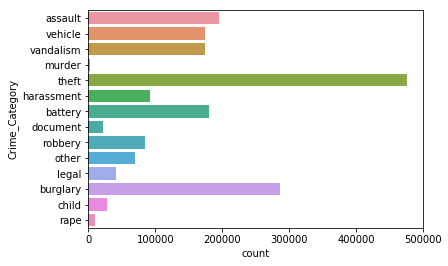

In [19]:
import seaborn as sns
sns.countplot(y='Crime_Category', data = y)

In [20]:
temp = y.loc[y['Crime_Category'] == 'theft']
#sns.countplot(y='Crime_Category', data = y)

In [ ]:
temp = y.loc[y['Crime_Category'] == 'theft']
#sns.countplot(y='Crime_Category', data = y)
#sns.countplot(y='Crime Code Description', data = y)

ax = sns.countplot(x="Crime Code Description", data=y,  order=temp['Crime Code Description'].value_counts().iloc[0:5].index, hue="Victim Sex")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",  fontsize=7)
plt.tight_layout()
plt.show()

In [ ]:
temp = y.loc[y['Crime_Category'] == 'other']
#sns.countplot(y='Crime_Category', data = y)
#sns.countplot(y='Crime Code Description', data = y)

ax = sns.countplot(x="Crime Code Description", data=y,  order=temp['Crime Code Description'].value_counts().iloc[0:5].index, hue="Victim Sex")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",  fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
temp = y.loc[y['Crime_Category'] == 'rape']
#sns.countplot(y='Crime_Category', data = y)
#sns.countplot(y='Crime Code Description', data = y)

ax = sns.countplot(x="Crime Code Description", data=y,  order=temp['Crime Code Description'].value_counts().iloc[0:5].index, hue="Victim Sex")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",  fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
temp = y.loc[y['Crime_Category'] == 'child']
#sns.countplot(y='Crime_Category', data = y)
#sns.countplot(y='Crime Code Description', data = y)

ax = sns.countplot(x="Crime Code Description", data=y,  order=temp['Crime Code Description'].value_counts().iloc[0:5].index, hue="Victim Sex")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",  fontsize=5)
plt.tight_layout()
plt.show()

In [ ]:
temp = y.loc[y['Crime_Category'] == 'assault']
#sns.countplot(y='Crime_Category', data = y)
#sns.countplot(y='Crime Code Description', data = y)

ax = sns.countplot(x="Crime Code Description", data=y,  order=temp['Crime Code Description'].value_counts().iloc[0:5].index, hue="Victim Sex")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",  fontsize=5)
plt.tight_layout()
plt.show()

In [40]:
z = y[(y['Victim Sex'] =='F') | (y['Victim Sex'] == 'M')]


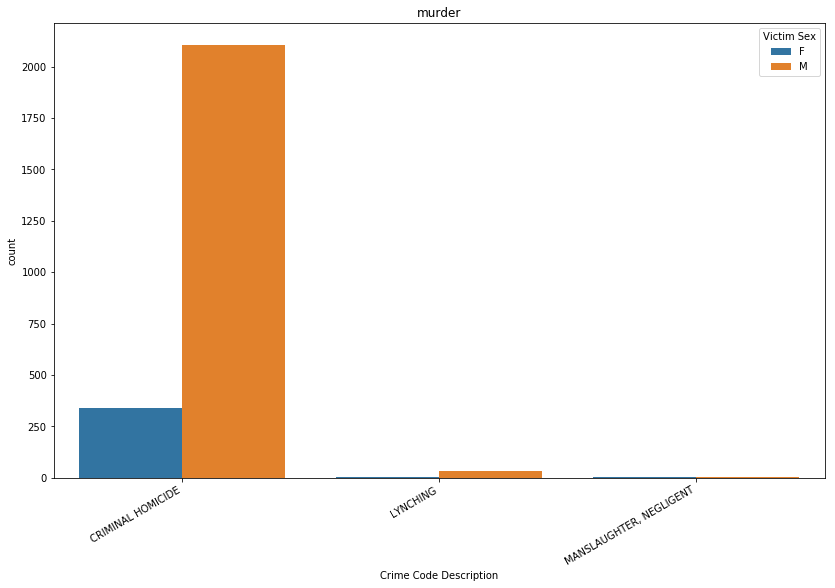

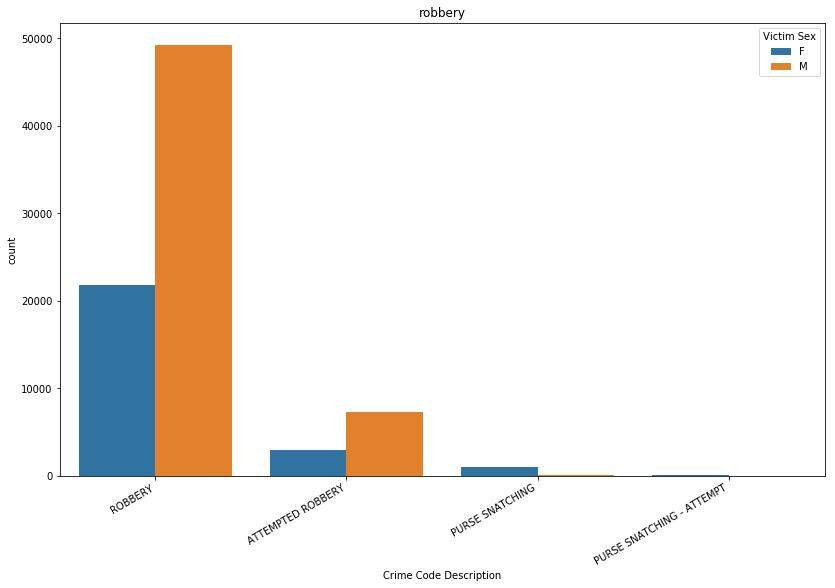

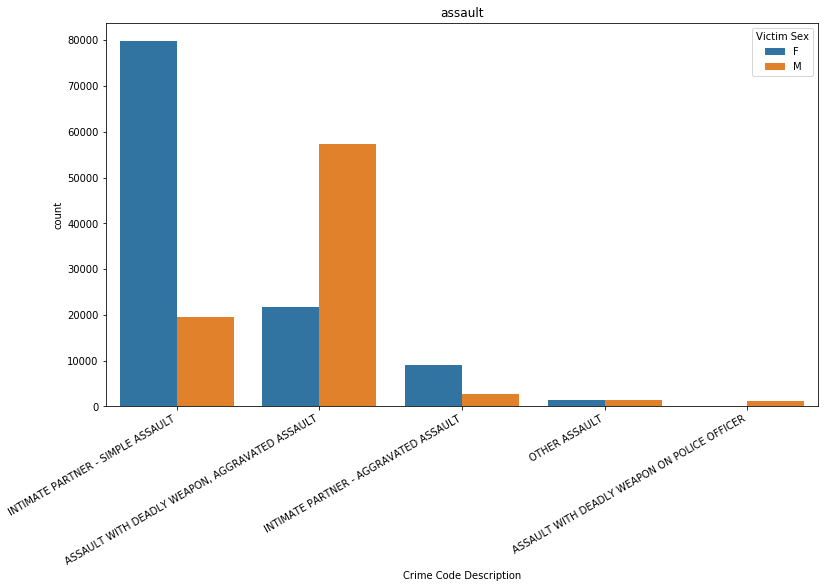

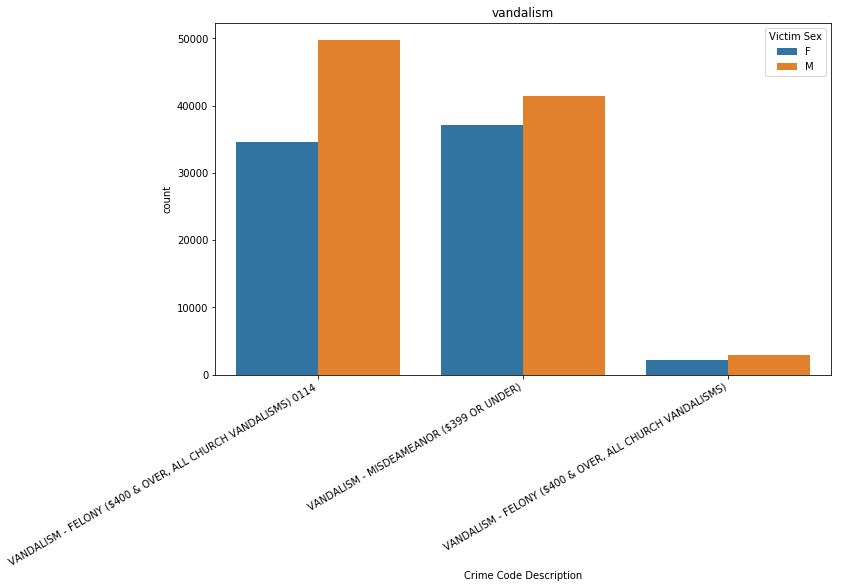

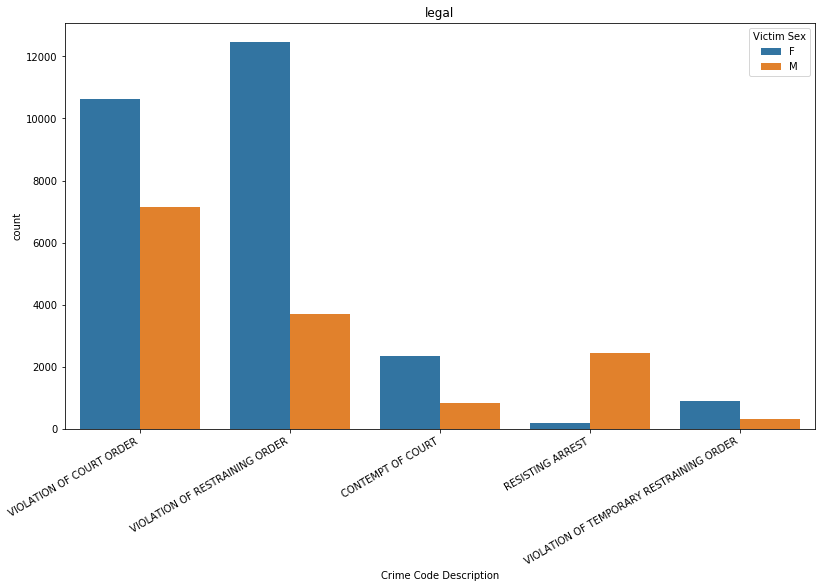

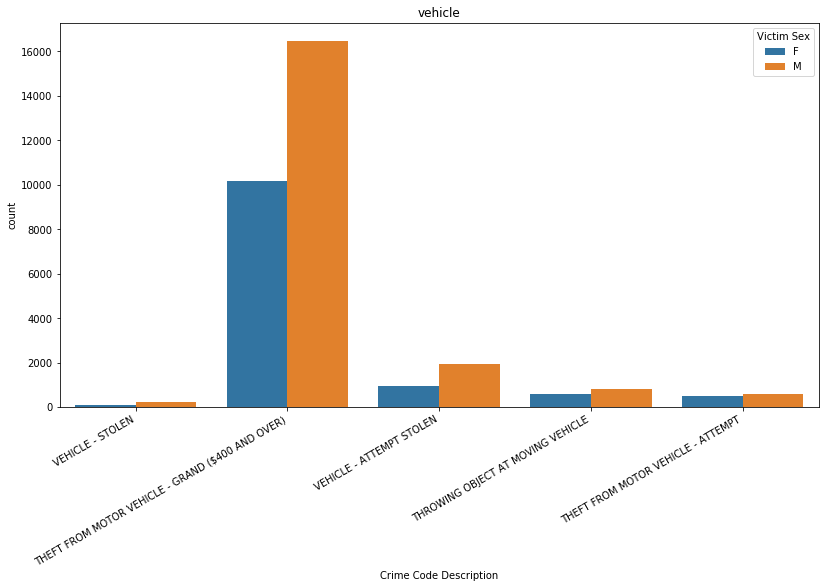

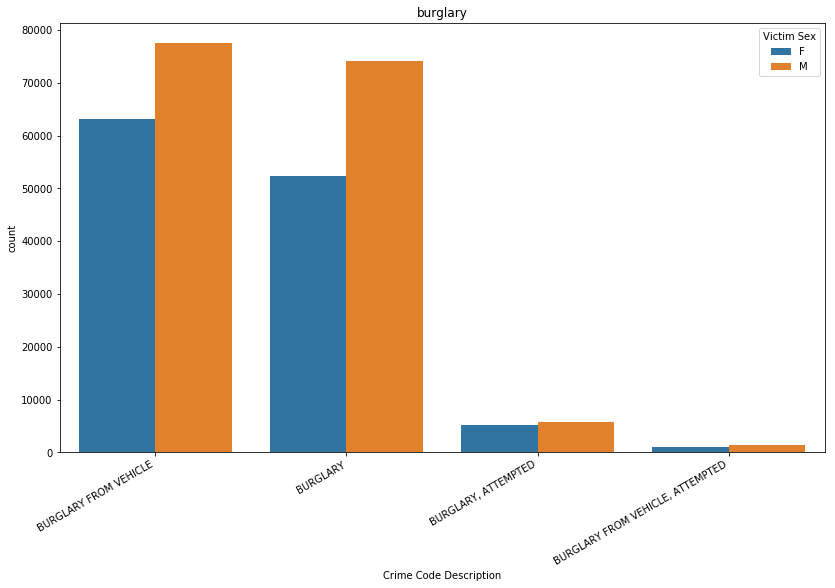

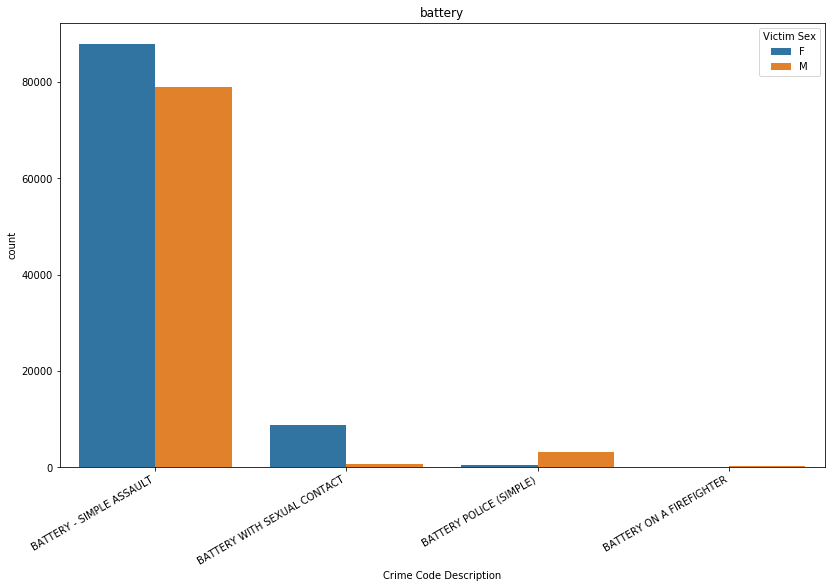

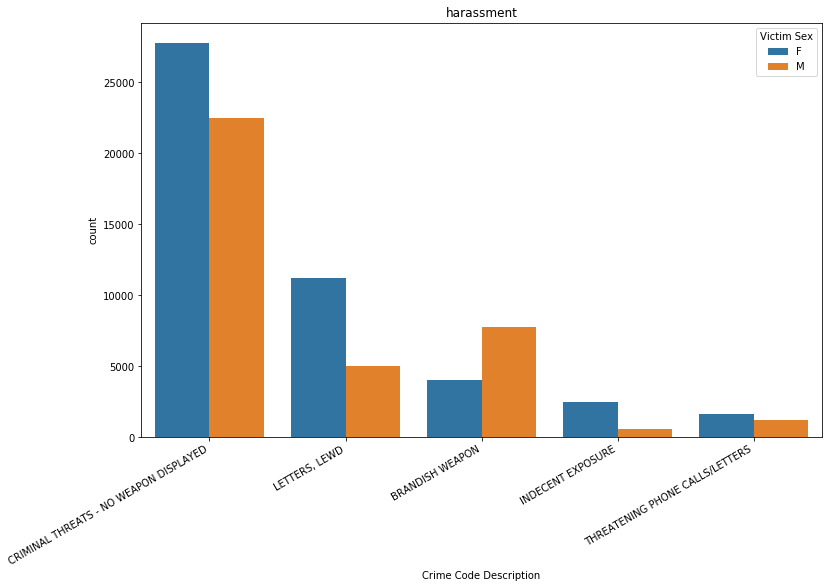

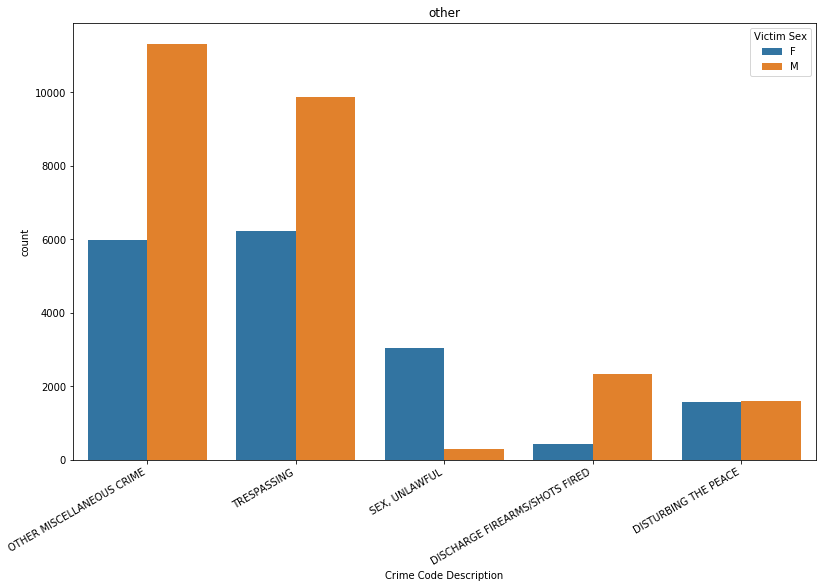

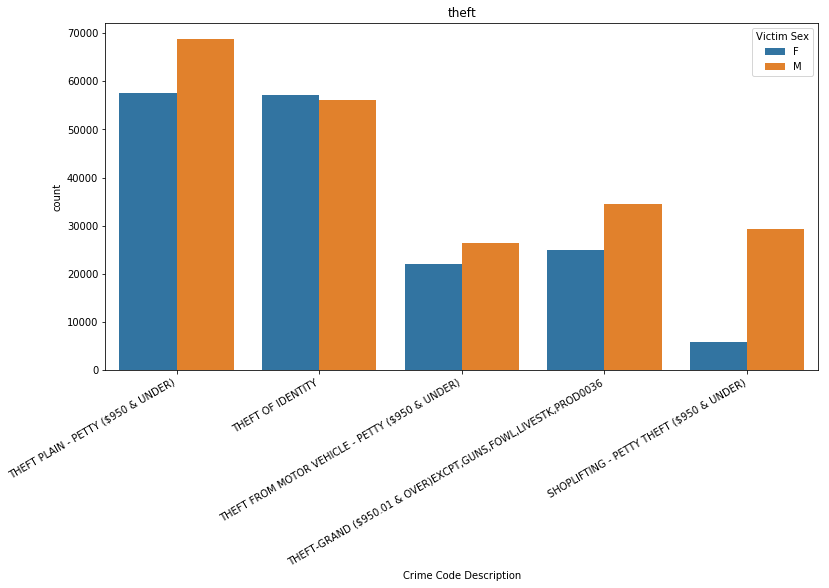

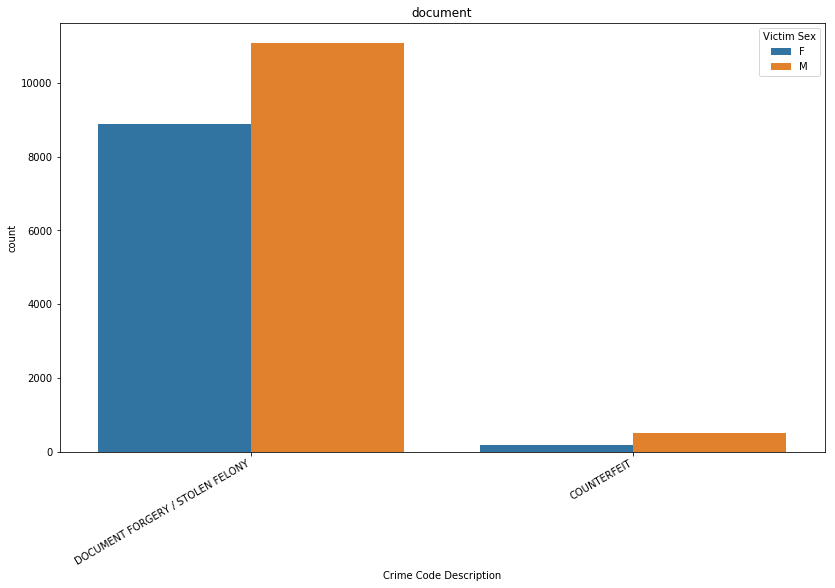

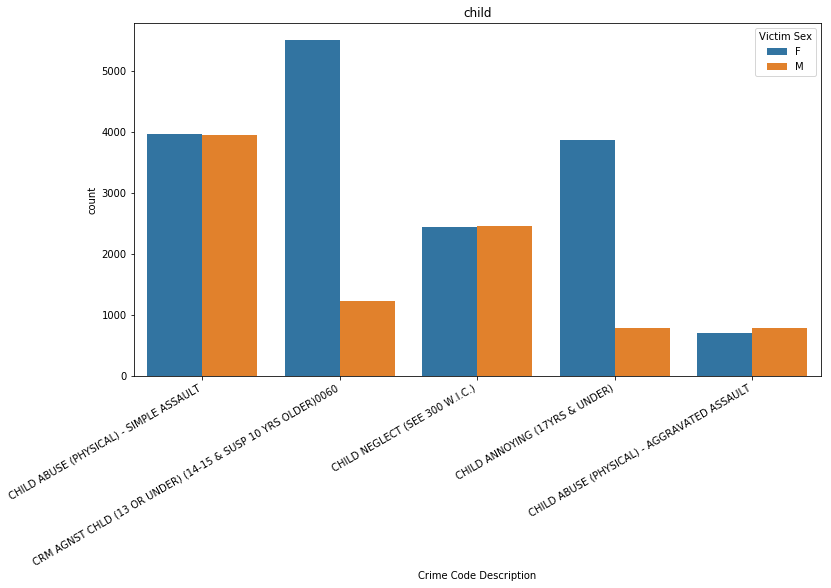

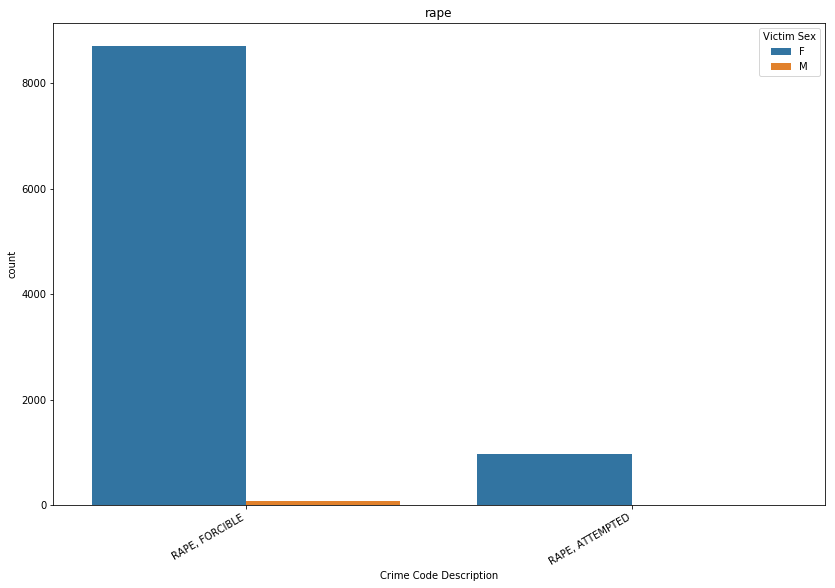

In [44]:
list2 = ('murder','robbery','assault','vandalism','legal','vehicle', 'burglary','battery','harassment','other' ,'theft','document', 'child' , 'rape')
for i in list2:
    temp = y.loc[y['Crime_Category'] == i]
    ax = sns.countplot(x="Crime Code Description", data=z,  order=temp['Crime Code Description'].value_counts().iloc[0:5].index, hue="Victim Sex")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",  fontsize=10)
    ax.set_title(i)
    ax.figure.set_size_inches(11.7, 8.27)
    plt.tight_layout()
    plt.show()
    ax.figure.savefig("gender"+i+".png");

   Crime_Category  Difference
7          murder    1.098879
10        robbery    1.679210
0         assault    3.676279
12      vandalism    4.677390
6           legal    5.031348
13        vehicle    5.197289
2        burglary    5.350912
1         battery    6.235880
5      harassment   15.267579
8           other   36.402122
11          theft   36.752859
4        document   53.838845
3           child   96.667636
9            rape  106.343357


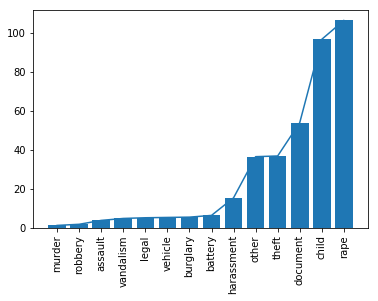

In [23]:
t1 =  y.groupby('Crime_Category', as_index=False)['Difference'].mean().sort_values(by='Difference')
#sns.countplot(x= "Crime_Category", hue ="Difference", data= t1)
print(t1)
plt.plot(t1.Crime_Category, t1.Difference)


bars = list2
y_pos = np.arange(len(bars))

#print( t1['Time_Code'].value_counts().sort_index())
# Create bars
plt.bar(y_pos,  t1['Difference'])
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
 
# Show graphic
plt.show()

In [24]:
list = ('murder','robbery','assault','vandalism','legal','vehicle', 'burglary','battery','harassment','other' ,'theft','document', 'child' , 'rape')
dd = {}
for i in list:
    dd[i] = {}

year_wise ={}
for i in range(2010,2018):
    year_wise[i] =  y.loc[y['YearOccur'] == i].groupby('Crime_Category', as_index=False)['Difference'].mean().sort_values(by='Difference')
    print("FOR YEAR: ", i)
    print(year_wise[i])
    for j in range(len(year_wise[i])):
        cat = year_wise[i].at[j,'Crime_Category']
        val = year_wise[i].at[j,'Difference']
        #print(i)
        dd[cat][i] = val

FOR YEAR:  2010
   Crime_Category  Difference
7          murder    1.838926
10        robbery    2.320392
0         assault    4.414491
12      vandalism    5.577285
13        vehicle    6.351875
2        burglary    7.070016
6           legal    7.629869
1         battery    9.307088
5      harassment   18.199300
8           other   57.572464
4        document   64.685285
11          theft   69.203529
3           child  162.494641
9            rape  182.838150
FOR YEAR:  2011
   Crime_Category  Difference
7          murder    0.813953
10        robbery    1.835264
0         assault    4.602010
12      vandalism    4.996232
6           legal    5.349059
2        burglary    5.555138
13        vehicle    5.594362
1         battery    7.050115
5      harassment   17.619331
8           other   52.885485
4        document   63.164632
11          theft   64.192743
3           child  135.046883
9            rape  209.748352
FOR YEAR:  2012
   Crime_Category  Difference
10        robbery    1

In [ ]:
print(dd)

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(10,10))

#plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow'])
j = 0
list = ('assault', 'theft', 'robbery', 'rape')
for i in list:
    keys = np.fromiter(dd[i].keys(), dtype=int)
    vals = np.fromiter(dd[i].values(), dtype=float)
    plt.plot(keys, vals)
  
plt.legend(['assault', 'theft', 'robbery', 'rape'], loc='upper left')
#'robbery','assault','vandalism','legal','vehicle', 'burglary','battery','harassment','other' ,'theft','document', 'child' , 'rape'
plt.show()





year_wise ={}
for i in range(2010,2018):
    year_wise[i] =  y.loc[y['YearOccur'] == i].groupby('Crime_Category', as_index=False)['Difference'].mean().sort_values(by='Difference')
    print("FOR YEAR: ", i)
    print(year_wise[i])

In [ ]:
print(y.columns)
df10_18 = pd.merge( pd.merge(pd.merge(cat_perc_2012, cat_perc_2013, on=arg), cat_perc_2014, on=arg),cat_perc_2015, on=arg)
df12_18 = pd.merge( pd.merge(pd.merge(df12_15, cat_perc_2016, on=arg), cat_perc_2017, on=arg),cat_perc_2018, on=arg)
df12_18.columns = [nameTODisplay, 'Year_2012','Year_2013','Year_2014','Year_2015','Year_2016','Year_2017','Year_2018']

In [ ]:
#print(t1['Crime_Category'].unique)

bars = (' robbery','assault','vandalism','legal','vehicle', 'burglary','battery','harassment','other'  ,'theft','document',
        'child' , 'rape')
#bars = t1['Crime_Category'].unique
y_pos = np.arange(len(bars))

#print( t1['Time_Code'].value_counts().sort_index())
#Create bars
plt.bar(y_pos,  t1['Difference'].tolist())
 
#Create names on the x-axis
plt.xticks(y_pos, bars)
 
#Show graphic
plt.show()
